In [22]:
import pandas as pd
import math
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [23]:
def sigmoid(x):
    return 1.0/(1+np.exp(-x))

def cost(X, y, beta):
    m = len(y)
    h = sigmoid(X @ beta)
    epsilon = 1e-5
    return (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))

def gradient(X,y,beta):
    return (X.T @ (sigmoid(X @ beta) - y))

def hessian(X,y,beta):
    return X.T * (np.diag(np.ravel(np.exp(X*beta)/np.power(1+np.exp(X*beta),2))) * X)

def predict(X, beta):
    return np.round(signmoid(X @ beta))

def gradient_descent(X, y, beta, learning_rate, iterations):
    m = len(y)
    cost_record = np.zeros((iterations,1))
    
    for i in range(iterations):
        beta = beta - (learning_rate * gradient(X,y,beta)/len(y))
        cost_record[i] = cost(X, y, beta)
    return (cost_record, beta)

def newton_method(X, y, beta, iterations):
    m = len(y)
    cost_record = np.zeros((iterations,1))
    TOL = np.power(10.,-10)
    counter = 0
    while np.linalg.norm(gradient(X,y,beta)) > TOL:
        beta -= np.linalg.inv(hessian(X, y, beta))*gradient(X, y, beta)
        cost_record[counter] = cost(X, y, beta)
        counter+=1
    return (cost_record, beta)

In [24]:
def fit(y, X, iterations = 100, learning_rate = 0.03, method = 'Gradident_Descent'):
    m = len(y)
    X = np.hstack((np.ones((m,1)),X))
    n = np.size(X,1)
    beta = np.zeros((n,1))
    initial_cost = cost(X, y, beta)

    print("Initial Cost is: {} \n".format(initial_cost))

    if method == 'Gradident_Descent':
        (cost_history, beta_optimal) = gradient_descent(X, y, beta, learning_rate, iterations)
    elif method == 'Newton Method':
        (cost_history, beta_optimal) = newton_method_demo(X, y, beta, iterations)
    else:
        print('Unsupportinged Method')

    return beta_optimal

## Benchmark from sklearn

In [25]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)
m = len(y)
X = np.hstack((np.ones((m,1)),X))
y = y[:,np.newaxis]

In [26]:
import numpy as np
X = np.matrix(np.ones(2484)).T
X = np.append(X,np.matrix([0]*1379+[2]*638+[4]*213+[5]*254).T,axis=1)
y = np.matrix([1]*24+[0]*1355+[1]*35+[0]*603+[1]*21+[0]*192+[1]*30+[0]*224).T

Optimal Parameters are: 
 [[-3.84667416]
 [ 0.39245526]] 



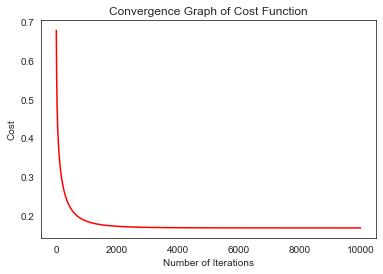

In [27]:
n = np.size(X,1)
params = np.zeros((n,1))

iterations =10000
learning_rate = 0.03

initial_cost = cost(X, y, params)


(cost_history, params_optimal) = gradient_descent(X, y, params,learning_rate, iterations)
print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

Optimal Parameters are: 
 [[-3.8662481 ]
 [ 0.39733662]] 



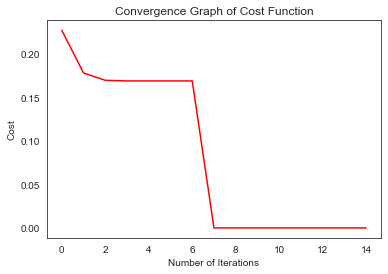

In [28]:
beta = np.matrix(np.zeros(X.shape[1])).T

iterations = 15
learning_rate = 0.03

(cost_history, params_optimal) = newton_method(X, y, beta, iterations)
print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [29]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs',C=1e9,fit_intercept=False).fit(X,np.ravel(y))
np.set_printoptions(suppress=True)
print(clf.coef_)

[[-3.86624885  0.39733451]]
